In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv("clean_data.csv")
X = df["review"]
y = df["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 

Accuracy: 0.9566170026292725

Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.98      0.96      1118
    positive       0.98      0.94      0.96      1164

    accuracy                           0.96      2282
   macro avg       0.96      0.96      0.96      2282
weighted avg       0.96      0.96      0.96      2282

Confusion Matrix:
 [[1091   27]
 [  72 1092]]


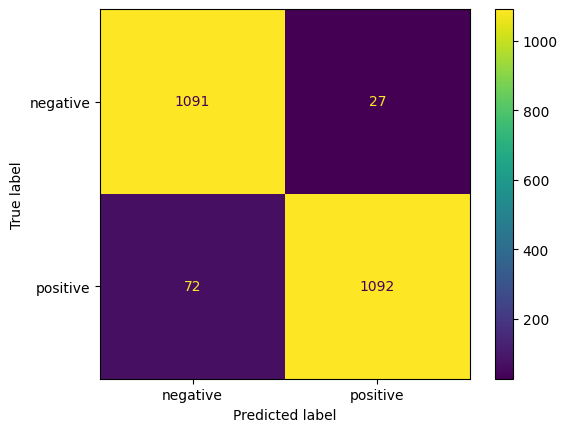

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
 
cm = confusion_matrix(y_test, y_pred, labels=["negative", "positive"])
 
disp  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

<Axes: >

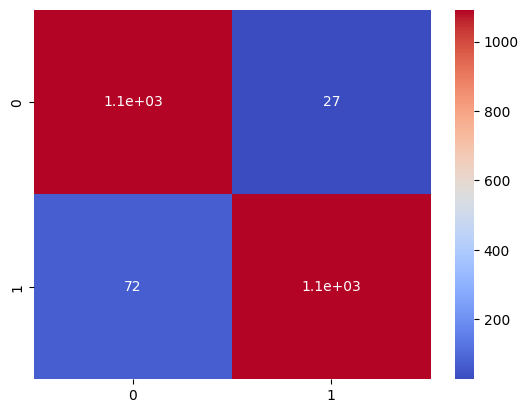

In [17]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),label=["negative", "positive"],annot=True,cmap="coolwarm")


